Loading dataset...
Splitting dataset...
Converting text to numerical features...
Building model...
Compiling model...
Training model...
Epoch 1/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.4953 - loss: 2.1917 - val_accuracy: 0.6920 - val_loss: 1.0366
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.8262 - loss: 0.6688 - val_accuracy: 0.6966 - val_loss: 0.9893
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9135 - loss: 0.3650 - val_accuracy: 0.6923 - val_loss: 1.0483
Epoch 4/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9488 - loss: 0.2320 - val_accuracy: 0.6838 - val_loss: 1.1265
Epoch 5/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.9602 - loss: 0.1741 - val_accuracy: 0.6769 - val_loss: 1.2030
Epoch 6/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9675 - loss: 0.1354 - val_accuracy: 0.6801 - val_loss: 1.2860
Epoch 7/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9674 - loss: 0.1

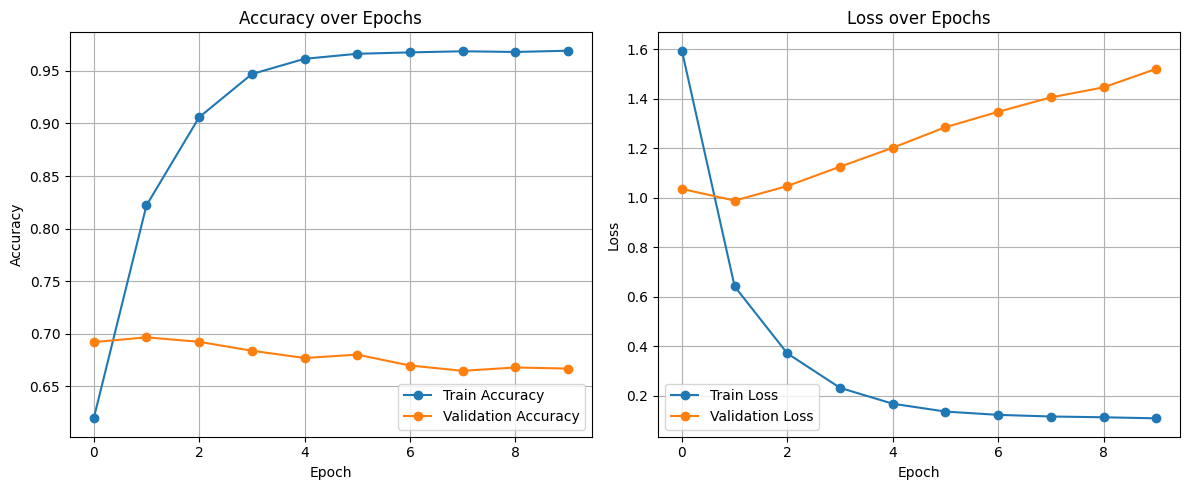

In [2]:
# Step 1: Import Libraries
import tensorflow as tf
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 2: Load the 20 Newsgroups Dataset
print("Loading dataset...")
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Step 3: Split the Dataset into Training and Testing Sets
print("Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Step 4: Convert Text Data into Numerical Form Using TfidfVectorizer
print("Converting text to numerical features...")
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Step 5: Define the Model
print("Building model...")
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5000,)),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(len(data.target_names), activation="softmax")
])

# Step 6: Compile the Model
print("Compiling model...")
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Step 7: Train the Model
print("Training model...")
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 8: Evaluate the Model
print("Evaluating model...")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 9: Visualize Training Progress
print("Plotting graphs...")
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
